In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed
from obpds import *

In [2]:
AlAsSb_GaSb = AlAsSb(a=GaSb.a())
AlAsSb_GaSb.set_parameter(ValueParameter('Eg_Gamma', 1.687, 'eV'))
AlAsSb_GaSb.set_parameter(ValueParameter('VBO', -0.724, 'eV'))

InAsSb_GaSb = InAsSb(a=GaSb.a())
InAsSb_GaSb.set_parameter(ValueParameter('Eg_Gamma', 0.247, 'eV'))
InAsSb_GaSb.set_parameter(ValueParameter('VBO', -0.236, 'eV'))

AlInAsSb_GaSb = IIIVZincBlendeTernary(
    name='AlInAsSb/GaSb',
    elements=('Al', 'In', 'AsSb'),
    binaries=(AlAsSb_GaSb, InAsSb_GaSb),
    parameters=[ValueParameter('Eg_Gamma_bowing', 0.47, 'eV'),
                ValueParameter('Eg_X_bowing', 1.6, 'eV'),
                ValueParameter('VBO_bowing', -0.235, 'eV'),
                ])

In [3]:
layers = [
    Layer(0.05*um, AlInAsSb_GaSb(Al=0.7)), # oxide
    Layer(0.3*um, GaSb, 1e17/cm3), # n-type layer
    ]

d = TwoTerminalDevice(layers=layers,
                      contacts=[SchottkyContact(), OhmicContact()],
                      Fp='right')

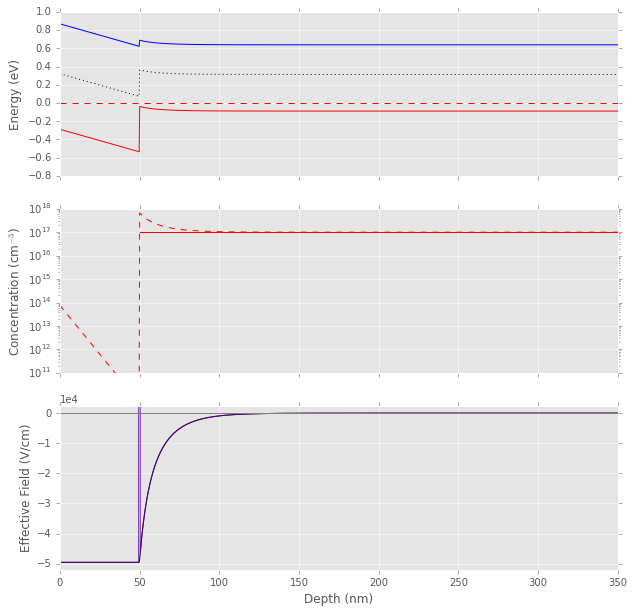

In [4]:
d.show_zero_current(V=0)

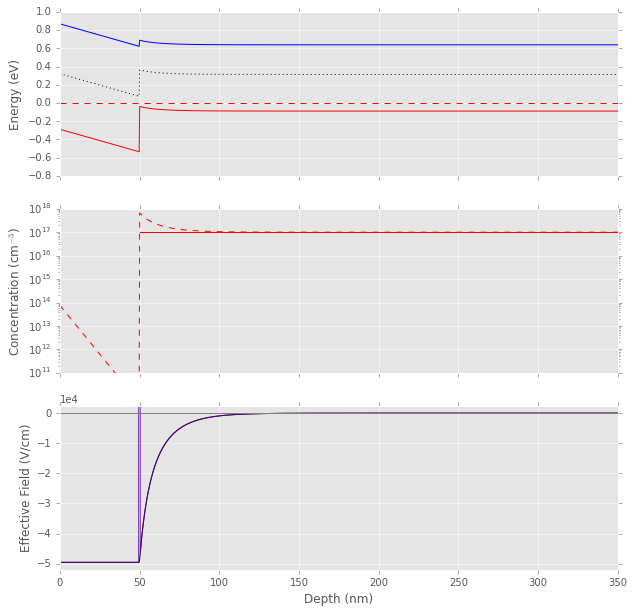

In [5]:
interactive(d.show_zero_current, V=(-5,5), T=fixed(300), N=fixed(1000), approx=fixed('kane'))